In [161]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_circles

In [31]:
X, Y = make_circles( n_samples=500,
    shuffle=True,
    noise=0.3,
    random_state=3,
    factor=0.2)

In [32]:
print(X.shape, Y.shape)

(500, 2) (500,)


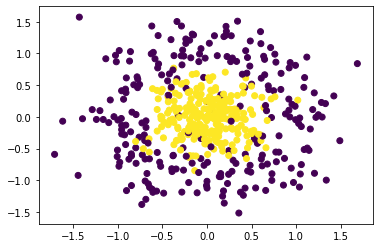

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=Y);

In [34]:
input_size = 2
layers = [4, 3]
output = 2

In [35]:
# a = np.array([[10, 20], [30, 40]])
# print(np.sum(a, axis = 1, keepdims=True))

In [138]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

In [139]:
softmax(np.array([[10, 20], [20, 20]])) # higher the activation higher the probablity

array([[4.53978687e-05, 9.99954602e-01],
       [5.00000000e-01, 5.00000000e-01]])

In [149]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)  
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [150]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l    

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

In [151]:
one_hot(np.array([0, 0, 1, 2]), 3)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [152]:
model = NeuralNetwork(input_size=2,  layers=layers, output_size=2)

In [153]:
model.forward(X[0])

array([[0.18504636, 0.81495364]])

In [154]:
# def train(x, y):
#     losses = []
#     y_oht = one_hot(y, depth=2)
#     for i in range(100):
#         y_ = model.forward(X)
#         l = loss(y_oht, y_)
#         losses.append(l)
#         if l >= 0.01:
#             model.backward(X, y_oht)
            
def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    val_loss = []
    val_acc = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    losses = []
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        losses.append(l)
        model.backward(X,Y_OHT)
        if(logs and ix%10==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
    
    
    return losses
    #model.summary()
            

In [155]:
losses = train(X, Y, model, epochs=1000)

Epoch 0 Loss 0.8048
Epoch 10 Loss 0.3045
Epoch 20 Loss 0.2379
Epoch 30 Loss 0.2003
Epoch 40 Loss 0.1724
Epoch 50 Loss 0.1527
Epoch 60 Loss 0.1402
Epoch 70 Loss 0.1328
Epoch 80 Loss 0.1284
Epoch 90 Loss 0.1257
Epoch 100 Loss 0.1239
Epoch 110 Loss 0.1228
Epoch 120 Loss 0.1220
Epoch 130 Loss 0.1216
Epoch 140 Loss 0.1216
Epoch 150 Loss 0.1222
Epoch 160 Loss 0.1230
Epoch 170 Loss 0.1230
Epoch 180 Loss 0.1219
Epoch 190 Loss 0.1207
Epoch 200 Loss 0.1198
Epoch 210 Loss 0.1193
Epoch 220 Loss 0.1189
Epoch 230 Loss 0.1187
Epoch 240 Loss 0.1185
Epoch 250 Loss 0.1183
Epoch 260 Loss 0.1182
Epoch 270 Loss 0.1180
Epoch 280 Loss 0.1179
Epoch 290 Loss 0.1179
Epoch 300 Loss 0.1178
Epoch 310 Loss 0.1177
Epoch 320 Loss 0.1177
Epoch 330 Loss 0.1177
Epoch 340 Loss 0.1178
Epoch 350 Loss 0.1179
Epoch 360 Loss 0.1179
Epoch 370 Loss 0.1180
Epoch 380 Loss 0.1180
Epoch 390 Loss 0.1179
Epoch 400 Loss 0.1178
Epoch 410 Loss 0.1176
Epoch 420 Loss 0.1174
Epoch 430 Loss 0.1172
Epoch 440 Loss 0.1170
Epoch 450 Loss 0.1169

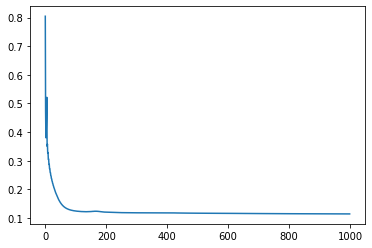

In [156]:
plt.plot(losses)

In [158]:
import sys
sys.path.insert(0, '../resources/')

In [163]:
from visualize import plot_decision_boundary

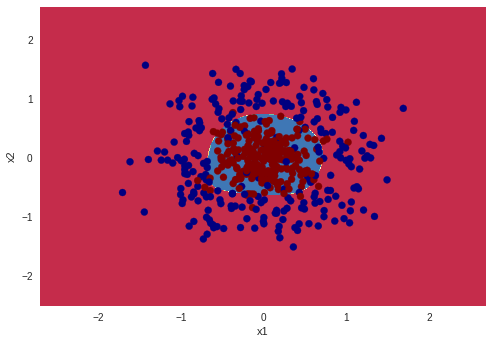

In [164]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)